<h1 align="center"><font color="yellow">Automate Data Analysis with Langchain?</font></h1>

<font color="yellow">Data Scientist.: Dr.Eddy Giusepe Chirinos Isidro</font>

Link de estudo:

* [Langchain: Pandas DataFrame](https://python.langchain.com/docs/integrations/toolkits/pandas)

<font color="orange">Usando a ferramenta `LangChain Agent` podemos interagir com `CSV`, `dataframe` com `Natural Language Query`.</font>

# <font color="red">Introdução</font>

<font color="orange">No atual cenário empresarial orientado por dados, a `automação` desempenha um papel crucial na simplificação dos processos de análise de dados. Estruturas como `Langchain` e `Gen AI` oferecem soluções valiosas para empresas que buscam economizar tempo e recursos. Ao aproveitar o `Langchain`, você pode construir seu próprio agente e automatizar a análise de dados.

Este artigo fornece um guia passo a passo conciso para criar um `agente Langchain` usando o `agente pandas pré-construído`. Com os recursos de automação da Langchain, as organizações podem aumentar a produtividade e tomar decisões informadas de forma eficiente no mundo em constante evolução da análise de dados.</font>


<font color="pink">O que é Langchain?</font>

`Langchain` é um framework usada para construir aplicativos com modelos de linguagem grande como `chatGPT`. Ele fornece uma maneira melhor de gerenciar `memória`, `prompts` e `criar cadeias` – uma série de ações. Além disso, Langchain oferece aos desenvolvedores a facilidade de criar `agentes`. `Um agente é uma entidade que pode executar uma série de ações com base em condições`.


<font color="pink">Análise de dados com Langchain</font>

Para fazer análise de dados com `langchain`, devemos primeiro instalar as bibliotecas `langchain` e `openai`. Você pode fazer isso baixando as bibliotecas necessárias e importando-as para o seu projeto.

In [1]:
# Importando bibliotecas 
import os 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from langchain.agents import create_pandas_dataframe_agent 
from langchain.llms import OpenAI 


from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file


# <font color="red">Criando um Agente Langchain</font>

<font color="orange">Para criar um agente Langchain, usaremos o agente pandas integrado (`create_pandas_dataframe_agent`) . Usaremos um conjunto de dados de risco de `doenças cardíacas` para esta demonstração. Esses dados estão disponíveis online e podem ser lidos diretamente no dataframe do pandas. Veja como você pode fazer isso:</font>

In [2]:
# Importando os Dados:
df = pd.read_csv('http://www-stat.stanford.edu/~tibs/ElemStatLearn/datasets/SAheart.data') 

# Inicializando o Agent: 
agent = create_pandas_dataframe_agent(OpenAI(temperature=0),
                                      df,
                                      verbose=True
                                     )
 
openai = OpenAI(temperature=0.0) 

openai.model_name # Isto irá imprimir o modelo que está sendo usado, por padrão usa ‘text-davinci-003’

'text-davinci-003'

Posso fazer o seguinte (só para ter uma ideia de meus dados):

In [3]:
df.head()

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


# <font color="red">Consultando o Agente</font>

<font color="orange">Depois de configurar seu agente, você pode começar a consultá-lo. Existem vários tipos de consultas que você pode solicitar ao seu agente. Vamos realizar algumas etapas de análise de dados:</font>

## <font color="pink">EDA</font>

In [4]:
# Vamos verificar o formato dos Dados:
agent("Qual é a forma do conjunto de dados?")



> Entering new AgentExecutor chain...
Thought: Preciso descobrir o número de linhas e colunas.
Action: python_repl_ast
Action Input: df.shape
Observation: (462, 11)
Thought: Agora sei que o conjunto de dados tem 462 linhas e 11 colunas.
Final Answer: O conjunto de dados tem 462 linhas e 11 colunas.

> Finished chain.


{'input': 'Qual é a forma do conjunto de dados?',
 'output': 'O conjunto de dados tem 462 linhas e 11 colunas.'}

In [5]:
# Identificando valores Missing:
agent("Quantos valores faltantes existem em cada coluna?")



> Entering new AgentExecutor chain...
Thought: I need to count the number of missing values in each column
Action: python_repl_ast
Action Input: df.isnull().sum()
Observation: row.names    0
sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64
Thought: I now know the final answer
Final Answer: 0 valores faltantes em cada coluna.

> Finished chain.


{'input': 'Quantos valores faltantes existem em cada coluna?',
 'output': '0 valores faltantes em cada coluna.'}

## <font color="pink">Análise com Gráficos</font>

<font color="orange">Nesta seção tentaremos ver a distribuição de várias variáveis.</font>



> Entering new AgentExecutor chain...
Thought: Eu preciso visualizar os dados para responder a pergunta.
Action: python_repl_ast
Action Input: df.chd.value_counts().plot(kind='bar')
Observation: Axes(0.125,0.11;0.775x0.77)
Thought: Agora eu sei a resposta final.
Final Answer: Um gráfico de barras mostrando a distribuição de pessoas que sofrem de doença coronariana.

> Finished chain.


{'input': 'Mostre a distribuição de pessoas que sofrem de doença coronariana usando um gráfico de barras.',
 'output': 'Um gráfico de barras mostrando a distribuição de pessoas que sofrem de doença coronariana.'}

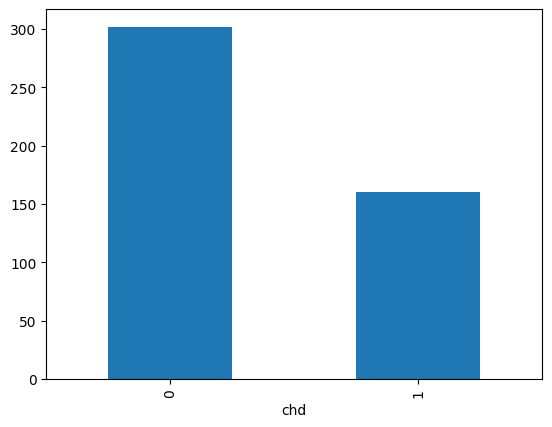

In [6]:
agent("Mostre a distribuição de pessoas que sofrem de doença coronariana usando um gráfico de barras.")

## <font color="pink">Testando hipóteses</font>

<font color="orange">Vamos tentar testar algumas hipóteses.</font>

In [7]:
# O tabaco causa doença coronariana?
agent("""valide a seguinte hipótese com o test t.
         Hipótese Nula: O consumo de tabaco não causa doença coronariana (chd).
         Hipótese Alternativa: O Consumo de Tabaco causa chd.""")




> Entering new AgentExecutor chain...
Thought: Preciso verificar se há uma correlação entre o consumo de tabaco e a doença coronariana.
Action: python_repl_ast
Action Input: df[['tobacco', 'chd']].corr()
Observation:           tobacco       chd
tobacco  1.000000  0.299718
chd      0.299718  1.000000
Thought: A correlação entre o consumo de tabaco e a doença coronariana é de 0.299718.
Action: python_repl_ast
Action Input: from scipy.stats import ttest_ind
Observation: 
Thought: Agora posso usar o test t para verificar a hipótese.
Action: python_repl_ast
Action Input: ttest_ind(df['tobacco'], df['chd'])
Observation: TtestResult(statistic=15.311112860827938, pvalue=2.553196692382764e-47, df=922.0)
Thought: O valor-p é muito baixo, o que significa que a hipótese nula é rejeitada.
Final Answer: A hipótese nula de que o consumo de tabaco não causa doença coronariana é rejeitada.

> Finished chain.


{'input': 'valide a seguinte hipótese com o test t.\n         Hipótese Nula: O consumo de tabaco não causa doença coronariana (chd).\n         Hipótese Alternativa: O Consumo de Tabaco causa chd.',
 'output': 'A hipótese nula de que o consumo de tabaco não causa doença coronariana é rejeitada.'}